## Семинар 15: "Обучение с подкреплением 2"

ФИО: Быстров Иван Дмитриевич

###  FrozenLake


<img src="http://vignette2.wikia.nocookie.net/riseoftheguardians/images/4/4c/Jack's_little_sister_on_the_ice.jpg/revision/latest?cb=20141218030206" alt="a random image to attract attention" style="width: 400px;"/>



In [ ]:
import gym
import numpy as np 
import random

#create a single game instance
env = gym.make("FrozenLake-v1")

#start new game
env.reset();

In [ ]:
# display the game state
env.render()


SFFF
FHFH
FFFH
HFFG


### legend

![img](https://cdn-images-1.medium.com/max/800/1*MCjDzR-wfMMkS0rPqXSmKw.png)

## Задание 1.
Подберите значения alpha и epsilon и найдите приближение оптимальной Q-функции для Frozen Lake.

In [ ]:

class QLearn:
    def __init__(self, actions, epsilon=0.1, alpha=0.2, gamma=0.9):
        self.q = {}
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.actions = actions

    def getQ(self, state, action):
        return self.q.get((state, action), 0.0)

    def learnQ(self, state, action, reward, value):
        oldv = self.q.get((state, action), None)

        if oldv is None:
            self.q[(state, action)] = reward
        else:
            self.q[(state, action)] = oldv + self.alpha * (value - oldv)

    def chooseAction(self, state):
        if random.random() < self.epsilon:
            action = random.choice(self.actions)
        else:
            q = [self.getQ(state, a) for a in self.actions]
            maxQ = max(q)
            count = q.count(maxQ)
            if count > 1:
                best = [i for i in range(len(self.actions)) if q[i] == maxQ]
                i = random.choice(best)
            else:
                i = q.index(maxQ)

            action = self.actions[i]
        return action

    def learn(self, state1, action1, reward, state2):
        maxqnew = max([self.getQ(state2, a) for a in self.actions])
        self.learnQ(state1, action1, reward, reward + self.gamma*maxqnew)

In [ ]:
def run_episode_qlearn(env, qlearn, gamma = 1.0, render = False, train=False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        action = qlearn.chooseAction(obs)
        obs_new, reward, done, _ = env.step(action)
        if train:
            qlearn.learn(obs, action, reward, obs_new)
        obs = obs_new
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [ ]:
def evaluate_qlearn(env, qlearn, gamma = 1.0,  n = 100):
    scores = [
            run_episode_qlearn(env, qlearn, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [ ]:
from IPython.display import clear_output

In [ ]:
params = dict()
params['alpha'] = 0
params['eps'] = 0
params['score'] = 0
params['model'] = None
num_episodes = 500
num_train = 500
alphas = [0.025*i for i in range(41)]
epses = [0.025*i for i in range(41)]
for alpha in alphas:
    for eps in epses:
        qlearn = QLearn(actions=range(env.env.nA), gamma=1, epsilon=eps, alpha=alpha)
        for i in range(num_train):
            run_episode_qlearn(env, qlearn, gamma=1, train=True)
        score = evaluate_qlearn(env, qlearn, n=num_episodes)
        if score > params['score']:
            params['alpha'] = alpha
            params['eps'] = eps
            params['score'] = score
            params['model'] = qlearn
            print('alpha =', alpha, ' eps =', eps, ' score =', score)

alpha = 0.0  eps = 0.0  score = 0.01
alpha = 0.0  eps = 0.025  score = 0.02
alpha = 0.0  eps = 0.275  score = 0.028
alpha = 0.025  eps = 0.0  score = 0.084
alpha = 0.025  eps = 0.125  score = 0.086
alpha = 0.025  eps = 0.25  score = 0.1
alpha = 0.05  eps = 0.375  score = 0.102
alpha = 0.07500000000000001  eps = 0.0  score = 0.134
alpha = 0.1  eps = 0.17500000000000002  score = 0.136
alpha = 0.1  eps = 0.30000000000000004  score = 0.152
alpha = 0.125  eps = 0.1  score = 0.238
alpha = 0.15000000000000002  eps = 0.1  score = 0.314
alpha = 0.17500000000000002  eps = 0.1  score = 0.342
alpha = 0.25  eps = 0.05  score = 0.466
alpha = 0.42500000000000004  eps = 0.05  score = 0.538
alpha = 0.47500000000000003  eps = 0.025  score = 0.62


In [ ]:
params

{'alpha': 0.47500000000000003,
 'eps': 0.025,
 'score': 0.62,
 'model': <__main__.QLearn at 0x212cebcc460>}

In [ ]:
score = evaluate_qlearn(env, params['model'], n=num_episodes)
print(score)

0.632


In [ ]:
run_episode_qlearn(env, params['model'], render=True)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


1.0

## Задание 2.
Обучите сеть DQN для среды http://gym.openai.com/envs/Pong-v0/ 

In [1]:
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e /content/Roms.rar /content/ROM/
! python -m atari_py.import_roms /content/ROM/

--2022-01-04 06:01:36--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11128004 (11M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  10.61M  4.68MB/s    in 2.3s    

2022-01-04 06:01:38 (4.68 MB/s) - ‘Roms.rar’ saved [11128004/11128004]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/HC ROMS.zip                                      36%  OK 
Extracting  /content/ROM/ROMS.zip                                         74% 99%  OK 
All OK
copying adventure.bin from ROMS/Adventure (1980) (Atari, Warren Robinett) (CX2613, CX2613P) (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin f

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import gym
import cv2
import numpy as np
import collections
import torch
import torch.nn as nn
import torch.optim as optim
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
device = torch.device("cuda")

class MaxAndSkipEnv(gym.Wrapper):
    def __init__(self, env=None):
        super(MaxAndSkipEnv, self).__init__(env)
        self.wrap_buffer = collections.deque(maxlen=2)

    def step(self, a):
        R = 0.0
        d = None
        for _ in range(4):
            o, r, d, info = self.env.step(a)
            self.wrap_buffer.append(o)
            R += r
            if d:
                break
        max_img = np.max(np.stack(self.wrap_buffer), axis=0)
        return max_img, R, d, info

    def reset(self):
        self.wrap_buffer.clear()
        o = self.env.reset()
        self.wrap_buffer.append(o)
        return o

class ImageProcess(gym.ObservationWrapper):
    def __init__(self, env=None):
        super(ImageProcess, self).__init__(env)
    
    def reset(self):
        self.buffer = np.zeros((4, 84, 84))
        return self.observation(self.env.reset())

    def observation(self, obs):
        img = np.reshape(obs, [210, 160, 3]).astype(np.float32)
        img = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.114
        img = cv2.resize(img, (84, 110), interpolation=cv2.INTER_AREA)
        img = np.reshape(img[18:102, :], [84, 84, 1])
        img = np.moveaxis(img.astype(np.uint8), 2, 0)
        self.buffer[:-1] = self.buffer[1:]
        self.buffer[-1] = img
        return self.buffer.astype(np.float32) / 255.0

def make_env(env_name):
    env = gym.make(env_name)
    env = MaxAndSkipEnv(env)
    return ImageProcess(env)

In [4]:
class DQN(nn.Module):
    def __init__(self):
        super(DQN, self).__init__()
        self.conv = nn.Sequential(nn.Conv2d(4, 32, 8, 4),
                                  nn.ReLU(),
                                  nn.Conv2d(32, 64, 4, 2),
                                  nn.ReLU(),
                                  nn.Conv2d(64, 64, 3, 1),
                                  nn.ReLU())
        self.fc = nn.Sequential(nn.Linear(3136, 512),
                                nn.ReLU(),
                                nn.Linear(512, 6))
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size()[0], -1)
        x = self.fc(x)
        return x

In [5]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.bs = 32
        self.memory = collections.deque(maxlen=10000)
        self.reset()
        self.play = False

    def append(self, mem):
        self.memory.append(mem)

    def sample(self, device):
        index = np.random.choice(len(self.memory), self.bs, replace=False)
        s, a, r, d, s1 = zip(*[self.memory[ind] for ind in index])
        return [torch.tensor(np.array(s)).to(device),
                torch.tensor(np.array(a)).to(device),
                torch.tensor(np.array(r, dtype=np.float32)).to(device),
                torch.ByteTensor(np.array(d, dtype=np.uint8)).to(device),
                torch.tensor(np.array(s1)).to(device)]

    def reset(self):
        self.R = 0.0
        self.s = self.env.reset()

    def play_step(self, net, eps, device="cpu"):
        ep_r = None
        if np.random.random() < eps:
            a = self.env.action_space.sample()
        else:
            v = torch.tensor(np.array([self.s])).to(device)
            Q = net(v)
            _, a = torch.max(Q, dim=1)
            a = int(a.item())
        s1, r, d, _ = self.env.step(a)
        self.R += r
        if not self.play:
            self.memory.append((self.s, a, r, d, s1))
        self.s = s1
        if d:
            ep_r = self.R
            self.reset()
        return ep_r

In [6]:
def train_model(train_border=10.0, device='cpu'):
    env = make_env("Pong-v0" )
    model1 = DQN().to(device)
    model2 = DQN().to(device)
    agent = Agent(env)
    eps = 1.0
    optimizer = optim.Adam(model1.parameters(), lr=1e-4)
    reward_hist = []
    avg_reward_hist = []
    episodes_hist = []
    num_ep = 0
    cur_frame = 0  
    loss = nn.MSELoss()
    while True:
        cur_frame += 1
        if eps * 0.999985 > 0.02:
            eps = eps * 0.999985
        else:
            eps = 0.02
        r = agent.play_step(model1, eps, device=device)
        if r is not None:
            reward_hist.append(r)
            avg_reward_hist.append(np.mean(reward_hist[-100:]))
            num_ep+=1
            episodes_hist.append(num_ep)
            clear_output(True)
            print("episode:{} reward:{:.2f} avg_reward:{:.3f} epsilon:{:.2f} num_frames:{}".format(len(reward_hist), 
                                                                                                   reward_hist[-1], 
                                                                                                   avg_reward_hist[-1], 
                                                                                                   eps, 
                                                                                                   cur_frame))
            plt.figure(figsize=(12, 5))
            plt.plot(episodes_hist, reward_hist, color = 'blue', label = 'current reward')
            plt.plot(episodes_hist, avg_reward_hist, color = 'green', label = 'mean reward')
            plt.xlabel('Episodes', fontsize=16)
            plt.ylabel('Reward', fontsize=16)
            plt.legend(loc=0, fontsize=16)
            plt.grid()
            plt.show()
            if avg_reward_hist[-1] > train_border:
                print("TRAINING FINISHED")
                path = "/content/drive/MyDrive/trained_agent.tar"
                torch.save(model1.state_dict(), path)
                return model1
            if num_ep % 100 == 0:
                path = "/content/drive/MyDrive/agent{}.tar".format(num_ep)
                torch.save(model1.state_dict(), path)
        if len(agent.memory) < 10000:
            continue
        s, a, r, d, s1 = agent.sample(device)
        Q_s = model1(s).gather(1, a.unsqueeze(-1)).squeeze(-1)
        Q_s1 = model2(s1).max(1)[0]
        Q_s1[d] = 0.0
        Q_s1 = Q_s1.detach()
        Q_ex = 0.99*Q_s1 + r
        loss_sample = loss(Q_s, Q_ex)
        optimizer.zero_grad()
        loss_sample.backward()
        optimizer.step()
        if cur_frame % 1000 == 0:
            model2.load_state_dict(model1.state_dict())

episode:3845 reward:-5.00 avg_reward:-1.010 epsilon:0.02 num_frames:3234096


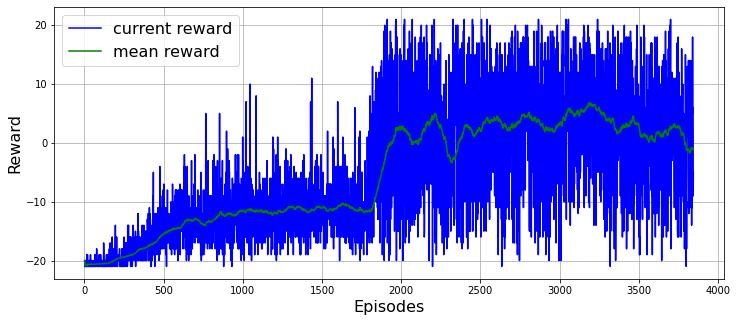

KeyboardInterrupt: ignored

In [7]:
trained_net = train_model(train_border=10.0, device=device)

In [12]:
def tune_model(train_border=10.0, device='cpu'):
    env = make_env("Pong-v0" )
    model1 = DQN().to(device)
    model2 = DQN().to(device)
    agent = Agent(env)
    path = "/content/drive/MyDrive/agent3400.tar"
    model1.load_state_dict(torch.load(path))
    model2.load_state_dict(torch.load(path))
    eps = 1.0
    optimizer = optim.Adam(model1.parameters(), lr=1e-4)
    reward_hist = []
    avg_reward_hist = []
    episodes_hist = []
    num_ep = 0
    cur_frame = 0  
    loss = nn.MSELoss()
    while True:
        eps = 0
        cur_frame += 1
        if eps * 0.999985 > 0:
            eps = eps * 0.999985
        else:
            eps = 0
        r = agent.play_step(model1, eps, device=device)
        if r is not None:
            reward_hist.append(r)
            avg_reward_hist.append(np.mean(reward_hist[-100:]))
            num_ep+=1
            episodes_hist.append(num_ep)
            clear_output(True)
            print("episode:{} reward:{:.2f} avg_reward:{:.3f} epsilon:{:.2f} num_frames:{}".format(len(reward_hist), 
                                                                                                   reward_hist[-1], 
                                                                                                   avg_reward_hist[-1], 
                                                                                                   eps, 
                                                                                                   cur_frame))
            plt.figure(figsize=(12, 5))
            plt.plot(episodes_hist, reward_hist, color = 'blue', label = 'current reward')
            plt.plot(episodes_hist, avg_reward_hist, color = 'green', label = 'mean reward')
            plt.xlabel('Episodes', fontsize=16)
            plt.ylabel('Reward', fontsize=16)
            plt.legend(loc=0, fontsize=16)
            plt.grid()
            plt.show()
            if avg_reward_hist[-1] > train_border and len(reward_hist)>300:
                print("TRAINING FINISHED")
                path = "/content/drive/MyDrive/trained_agent.tar"
                torch.save(model1.state_dict(), path)
                return model1
            if num_ep % 100 == 0:
                path = "/content/drive/MyDrive/bgent{}.tar".format(num_ep)
                torch.save(model1.state_dict(), path)
        if len(agent.memory) < 10000:
            continue
        s, a, r, d, s1 = agent.sample(device)
        Q_s = model1(s).gather(1, a.unsqueeze(-1)).squeeze(-1)
        Q_s1 = model2(s1).max(1)[0]
        Q_s1[d] = 0.0
        Q_s1 = Q_s1.detach()
        Q_ex = 0.99*Q_s1 + r
        loss_sample = loss(Q_s, Q_ex)
        optimizer.zero_grad()
        loss_sample.backward()
        optimizer.step()
        if cur_frame % 1000 == 0:
            model2.load_state_dict(model1.state_dict())

episode:301 reward:-13.00 avg_reward:15.470 epsilon:0.00 num_frames:201843


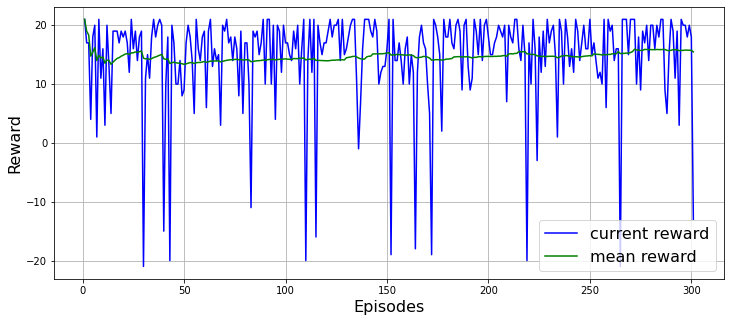

TRAINING FINISHED


In [13]:
trained_net = tune_model(train_border=15.0, device=device)

In [14]:
path = "/content/final_model.tar"
torch.save(trained_net.state_dict(), path)

In [21]:
def play_game(model, device="cpu"):
    env = make_env("Pong-v0" )
    model1 = model
    agent = Agent(env)
    s = env.reset()
    R = 0
    while True:
        v = torch.tensor(np.array([s])).to(device)
        Q = model(v)
        _, a = torch.max(Q, dim=1)
        a = int(a.item())
        s1, r, d, _ = env.step(a)
        R += r
        s = s1
        if d:
            ep_r = R
            screen = env.render(mode='rgb_array')
            break
    print("reward:{:.2f}".format(ep_r))
    plt.figure()
    plt.imshow(screen)
    plt.show()

reward:15.00


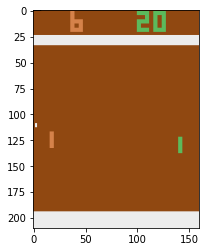

In [22]:
play_game(trained_net, device)